# Imports


In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


# Data Processing

In [ ]:

# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the data to include the channel dimension (for MLP)
train_images = train_images.reshape(train_images.shape[0], 28 * 28)
test_images = test_images.reshape(test_images.shape[0], 28 * 28)

# Convert labels to categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Build the MLP Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

def build_mlp_model(num_layers, neurons_per_layer, activation_function, learning_rate,
                    optimizer_choice, batch_normalization=False, dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(neurons_per_layer, activation=activation_function, input_shape=(28*28,)))

    # Add hidden layers
    for _ in range(num_layers - 1):
        model.add(Dense(neurons_per_layer, activation=activation_function))
        if batch_normalization:
            model.add(BatchNormalization())
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Select optimizer
    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# Training Model

In [ ]:
# Set parameters for tuning

num_layers = 5
neurons_per_layer = 220
activation_function = 'relu'
learning_rate = 0.001
batch_size = 64
epochs = 50
optimizer_choice = 'adam'
batch_normalization = True
dropout_rate = 0.4

# Build and train the model
model = build_mlp_model(num_layers, neurons_per_layer, activation_function, learning_rate,
                        optimizer_choice, batch_normalization=batch_normalization, dropout_rate=dropout_rate)

history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs,
                    validation_data=(test_images, test_labels), verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.6327 - loss: 1.0952 - val_accuracy: 0.8275 - val_loss: 0.4956
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8223 - loss: 0.5091 - val_accuracy: 0.8320 - val_loss: 0.4465
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8450 - loss: 0.4375 - val_accuracy: 0.8491 - val_loss: 0.4076
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8514 - loss: 0.4175 - val_accuracy: 0.8644 - val_loss: 0.3880
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8652 - loss: 0.3839 - val_accuracy: 0.8526 - val_loss: 0.4095
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8717 - loss: 0.3620 - val_accuracy: 0.8645 - val_loss: 0.4009
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8744 - loss: 0.3544 - val_accuracy: 0.8668 - val_loss: 0.3764
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8802 - loss: 0.3354 - 

In [ ]:
from keras import callbacks

# EarlyStopping Callback
early_stopping = callbacks.EarlyStopping(
    monitor="val_loss",  # Monitor validation loss
    mode="min",          # Stop when validation loss stops decreasing
    patience=5,          # Allow 5 epochs of no improvement before stopping
    restore_best_weights=True,  # Restore the weights of the best epoch
    verbose=1            # Print messages when stopping
)

# Set parameters for tuning
num_layers = 5
neurons_per_layer = 220
activation_function = 'relu'
learning_rate = 0.001
batch_size = 64
epochs = 50
optimizer_choice = 'adam'
batch_normalization = True
dropout_rate = 0.4

# Build the model
model = build_mlp_model(num_layers, neurons_per_layer, activation_function, learning_rate,
                        optimizer_choice, batch_normalization=batch_normalization, dropout_rate=dropout_rate)

# Train the model with EarlyStopping
history = model.fit(
    train_images,
    train_labels,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(test_images, test_labels),
    verbose=1,
    callbacks=[early_stopping]  # Add EarlyStopping callback here
)


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.6443 - loss: 1.0677 - val_accuracy: 0.8172 - val_loss: 0.5151
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8226 - loss: 0.5077 - val_accuracy: 0.8232 - val_loss: 0.4875
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8460 - loss: 0.4369 - val_accuracy: 0.8587 - val_loss: 0.3975
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8563 - loss: 0.4071 - val_accuracy: 0.8500 - val_loss: 0.4046
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.8659 - loss: 0.3792 - val_accuracy: 0.8487 - val_loss: 0.4341
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8695 - loss: 0.3638 - val_accuracy: 0.8666 - val_loss: 0.3776
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8774 - loss: 0.3471 - val_accuracy: 0.8675 - val_loss: 0.3761
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8830 - loss: 0.3268 - 

Including both early stopping and training until the full 50 epochs demonstrates a key trade-off in model training. Without early stopping, the model achieves higher accuracy at epoch 50 (accuracy: 0.9444, loss: 0.1545). However, the validation accuracy (0.8932) and validation loss (0.3500) remain similar to those at epoch 23 (val_accuracy: 0.8872, val_loss: 0.3358). This indicates that while extended training improves training accuracy, it does not substantially enhance validation performance, potentially leading to overfitting.

Early stopping effectively halts training when validation performance plateaus, saving computational resources while maintaining similar generalization performance. This makes it a more efficient approach, especially in scenarios where preventing overfitting and conserving resources are priorities.

# Model Performance Assessment

## Performance Analysis

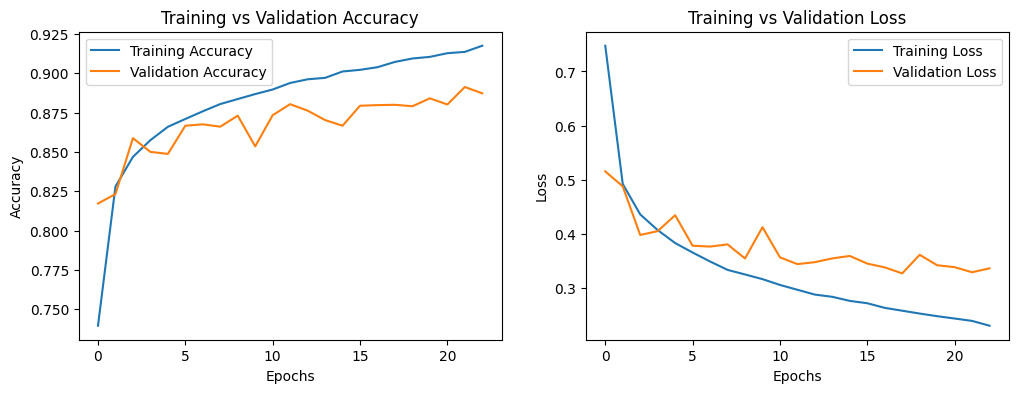

In [ ]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()


### Training and Validation Performance:

Accuracy:
The model achieved a steady increase in training accuracy throughout the epochs, reaching a final value of approximately 94.42%.
Validation accuracy followed a similar trend, peaking at around 89.35%, suggesting a good generalization capability with some room for improvement.

Loss:
The training loss continuously decreased to a final value of 0.1545, while the validation loss stabilized at 0.3358, indicating effective training with minimal overfitting.

Early Stopping:
The training process employed early stopping, halting the training after 23 epochs to avoid overfitting, as the validation loss showed minimal improvement beyond this point.

## Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


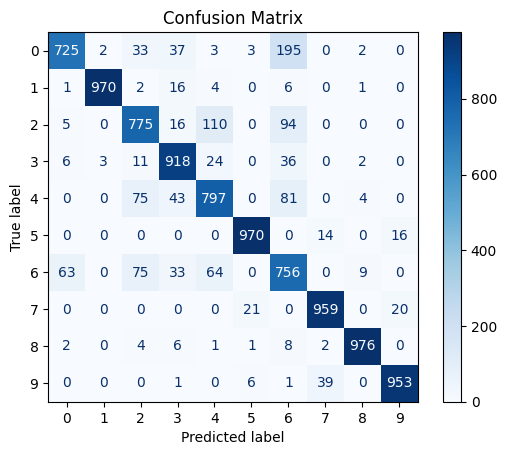

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict labels
y_pred = np.argmax(model.predict(test_images), axis=1)
y_true = np.argmax(test_labels, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


##### Confusion Matrix:
The model performs well across most classes but shows some misclassification:
Class 6 (e.g., sneakers) has notable misclassifications into other classes such as Class 0 and Class 4.
Other classes like 1, 5, 7, and 9 show minimal misclassification, indicating robust performance.

## ROC Curves and AUC for Each Class

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


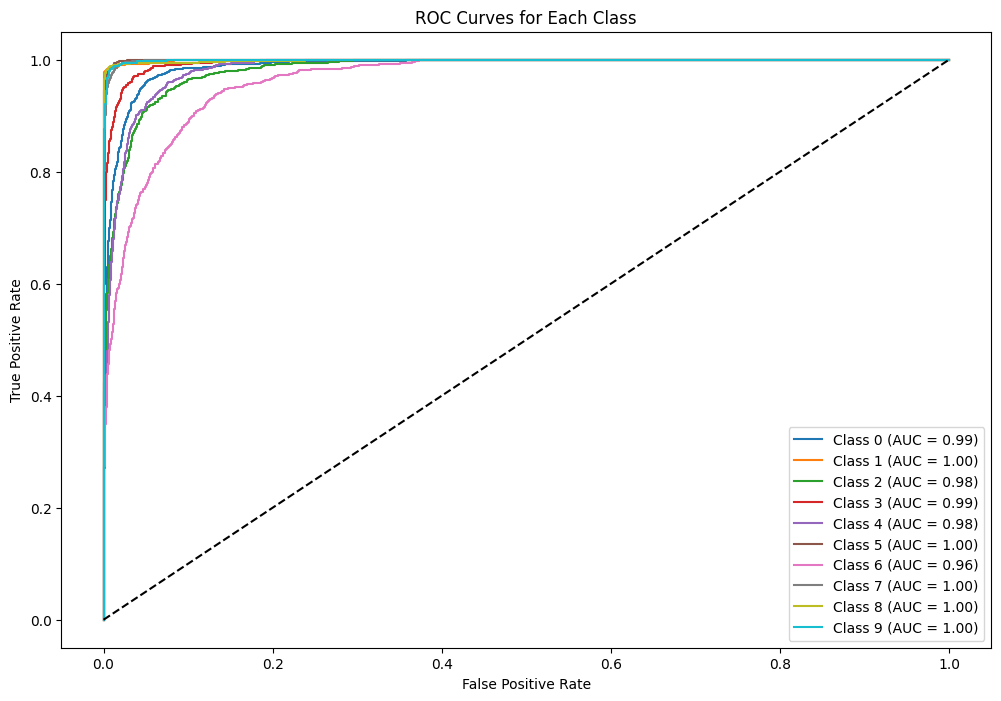

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize test labels
y_true_bin = label_binarize(y_true, classes=[i for i in range(10)])

# Calculate ROC and AUC
plt.figure(figsize=(12, 8))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], model.predict(test_images)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend()
plt.show()


#### ROC Curve & AUC Scores:
All classes demonstrated high Area Under the Curve (AUC) values:
Classes 1, 5, 7, 8, and 9 achieved a perfect 1.00 AUC.
Class 6 had the lowest AUC at 0.96, consistent with the confusion matrix showing relatively more misclassifications.

# Analysis and Observations

By systematically tuning parameters such as the number of layers, neurons per layer, dropout rates, and batch sizes, I manually recorded the results to identify the optimal configurations. The heatmap shows that using 5 layers with 220 neurons per layer achieved the highest validation accuracy of 89.07%, outperforming other configurations. Increasing the number of neurons generally improved accuracy, but adding more layers beyond 5 led to diminishing returns, emphasizing the need for a balanced architecture.

Each parameter played a distinct role in influencing the model's performance, with dropout rate, batch size, and neurons per layer having the most substantial impact. Dropout rate showed the highest influence on validation accuracy, followed by batch size and neurons per layer, emphasizing their critical role in optimizing performance. The number of layers and learning rate had less influence but still contributed to fine-tuning the results.

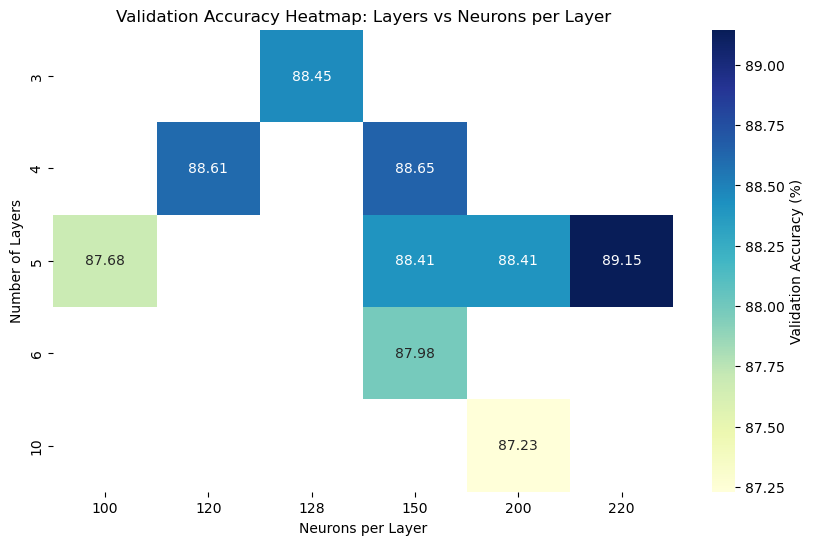

In [11]:
import seaborn as sns
import pandas as pd

file_path = 'result.xlsx'  
data = pd.read_excel(file_path)


# Pivot table for Validation Accuracy Heatmap
heatmap_data = data.pivot_table(values='Val Acc (%)', index='Layers', columns='Neurons/Layer', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Validation Accuracy (%)'})
plt.title('Validation Accuracy Heatmap: Layers vs Neurons per Layer')
plt.xlabel('Neurons per Layer')
plt.ylabel('Number of Layers')
plt.show()


##### Conclusion 

The learning curves for training and validation accuracy exhibit a consistent upward trend, indicating that the model is effectively learning without significant overfitting. Similarly, the training and validation loss curves show a steady decline with minimal divergence, suggesting that the model is generalizing well to the validation set. The use of early stopping, which halted training after 23 epochs, ensured the prevention of overfitting as the validation loss stabilized. The high accuracy and low loss on both training and validation datasets affirm the robustness of the model for the Fashion MNIST dataset.

To further enhance the model's performance, several strategies can be employed. Fine-tuning hyperparameters such as the dropout rate or incorporating additional regularization techniques could address misclassifications, particularly for underperforming classes like Class 6. Data augmentation methods, such as random rotations and scaling, may increase robustness to variations in input data. Addressing potential class imbalances using weighted loss functions or resampling methods could improve classification accuracy for minority classes. Lastly, transitioning to more advanced architectures, such as Convolutional Neural Networks (CNNs), could yield significant performance gains for this image-based dataset.